<a href="https://colab.research.google.com/github/Beytullah-1001/Machine-Learning-Notes/blob/main/PCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [490]:
import pandas as pd
import numpy as np

In [491]:
hit=pd.read_csv("/Hitters.csv")

In [492]:
df=hit.copy()

In [493]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [494]:
df=df.dropna()#Removes missing values
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [495]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [496]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])#We transform categorical data to dummie variables
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [497]:
y=df["Salary"]

In [498]:
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')

In [499]:
X=pd.concat([X_,dms[["League_N",'Division_W','NewLeague_N']]],axis=1)#We joined 2 dataframe.First one is X_,the other one is our dummies variables

In [500]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [501]:
from sklearn.model_selection import train_test_split


In [502]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [503]:
X_train.shape

(197, 19)

In [504]:
X_test.shape

(66, 19)

In [505]:
y_train.shape

(197,)

In [506]:
y_test.shape

(66,)

In [507]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
pca=PCA()

In [508]:
X_reduced_train=pca.fit_transform(scale(X_train))

In [509]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [510]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]#When we reach 10,we can explain ratio of varience as 97.28.

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [511]:
linear_regression=LinearRegression()
pcr_model=linear_regression.fit(X_reduced_train,y_train)#Our pcr model with reduced X_train(thats why we called pcr)
coefs=pcr_model.coef_#Our coefficients
intercept=pcr_model.intercept_

# Predict


In [512]:
y_pred=pcr_model.predict(X_reduced_train)

In [513]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [514]:
from sklearn.metrics import mean_squared_error,accuracy_score



In [515]:
np.sqrt(mean_squared_error(y_train,y_pred))

289.3292825564976

In [516]:
df["Salary"].mean()

535.9258821292775

In [517]:
pca2=PCA()
X_reduced_test=pca2.fit_transform(scale(X_test))

In [518]:
y_pred=pcr_model.predict(X_reduced_test)

In [519]:
mse_test=np.sqrt(mean_squared_error(y_test,y_pred))

<h1>Model Tuning</h1>

In [520]:
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train[:,0:10],y_train)
y_pred=pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test,y_pred)))

390.79142556822234


In [521]:
from sklearn import model_selection

In [522]:
cv_10=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)

In [523]:
lm=LinearRegression()
RMSE=[]#Our RMSE values

In [524]:
for i in np.arange(1,X_reduced_train.shape[1]+1):
  score=np.sqrt(-1*model_selection.cross_val_score(lm,
                                                   X_reduced_train[:,:i],
                                                   y_train.ravel()
                                                   ,cv=cv_10,
                                                   scoring='neg_mean_squared_error').mean())
  RMSE.append(score)
  
 

Text(0.5, 1.0, 'Model Tuning For Salary Prediction Model ')

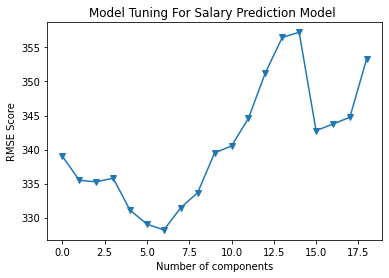

In [525]:
import matplotlib.pyplot as plt
plt.plot(RMSE,'-v')
plt.xlabel('Number of components')
plt.ylabel('RMSE Score')
plt.title('Model Tuning For Salary Prediction Model ')

In [529]:
lm=LinearRegression()
lm.fit(X_reduced_train[:,0:6],y_train)# We can select 6 component


LinearRegression()